## Artificial Intelligence Assignment 2
## No7. Neural Network 4
## 20132651 Sungjae Lee

In [2]:
import torch

In [3]:
 class TwoLayerNet(torch.nn.Module):
        def __init__(self, D_in, H, D_out):
            super(TwoLayerNet, self).__init__()
            self.linear1 = torch.nn.Linear(D_in, H)
            self.linear2 = torch.nn.Linear(H, D_out)
            
        def forward(self, x):
            h_relu = self.linear1(x).clamp(min = 0)
            y_pred = self.linear2(h_relu)
            return y_pred

In [4]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [5]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [23]:
model = TwoLayerNet(D_in, H, D_out)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)
loss_list = []

In [24]:
for t in range(500):
    y_pred = model(x)
    loss = torch.nn.functional.mse_loss(y_pred, y)
    print(t, loss.item())
    loss_list.append(loss.item())
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

0 1.0301014184951782
1 1.0299674272537231
2 1.029833436012268
3 1.029699444770813
4 1.0295655727386475
5 1.0294315814971924
6 1.0292978286743164
7 1.0291639566421509
8 1.0290300846099854
9 1.0288963317871094
10 1.0287625789642334
11 1.0286288261413574
12 1.028495192527771
13 1.0283615589141846
14 1.0282278060913086
15 1.0280941724777222
16 1.0279606580734253
17 1.0278270244598389
18 1.027693510055542
19 1.0275599956512451
20 1.0274264812469482
21 1.0272929668426514
22 1.027159571647644
23 1.0270260572433472
24 1.0268926620483398
25 1.0267592668533325
26 1.0266259908676147
27 1.026492714881897
28 1.0263593196868896
29 1.0262260437011719
30 1.026092767715454
31 1.0259596109390259
32 1.0258264541625977
33 1.0256932973861694
34 1.0255601406097412
35 1.025426983833313
36 1.0252939462661743
37 1.0251609086990356
38 1.025027871131897
39 1.0248950719833374
40 1.0247621536254883
41 1.0246293544769287
42 1.0244965553283691
43 1.0243638753890991
44 1.0242310762405396
45 1.0240983963012695
46 1.02

414 0.9772821068763733
415 0.9771609902381897
416 0.9770398736000061
417 0.9769188165664673
418 0.9767977595329285
419 0.9766767621040344
420 0.9765557646751404
421 0.9764347672462463
422 0.9763138294219971
423 0.9761928915977478
424 0.9760720133781433
425 0.9759511947631836
426 0.9758303761482239
427 0.9757096767425537
428 0.9755889773368835
429 0.9754682779312134
430 0.9753475785255432
431 0.9752269387245178
432 0.9751062989234924
433 0.974985659122467
434 0.9748650789260864
435 0.9747444987297058
436 0.9746239185333252
437 0.9745034575462341
438 0.9743829369544983
439 0.9742624163627625
440 0.9741419553756714
441 0.9740214943885803
442 0.9739010334014893
443 0.973780632019043
444 0.9736602306365967
445 0.9735398888587952
446 0.9734195470809937
447 0.9732992053031921
448 0.9731789231300354
449 0.9730586409568787
450 0.9729383587837219
451 0.97281813621521
452 0.9726978540420532
453 0.9725778102874756
454 0.9724578261375427
455 0.9723379015922546
456 0.9722179770469666
457 0.972098112

In [25]:
import matplotlib.pyplot as plt

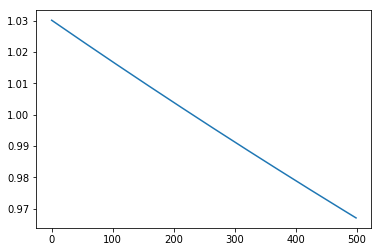

In [26]:
plt.plot(loss_list)